# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data=pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


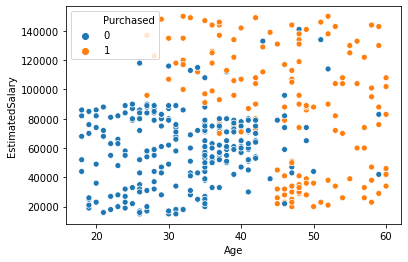

In [4]:
sns.scatterplot(data.Age,data.EstimatedSalary,hue=data.Purchased)

In [5]:
x=data.iloc[:,2:4].values
y=data.iloc[:,-1].values

# Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Building AdaBoost Model

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=10)

In [9]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=10)

In [11]:
y_pred=gb.predict(x_test)

In [12]:
y_pred_train=gb.predict(x_train)

# Evaluating Model

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred),accuracy_score(y_train,y_pred_train)

(0.9125, 0.91875)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[47,  5],
       [ 2, 26]], dtype=int64)

In [15]:
confusion_matrix(y_train,y_pred_train)

array([[186,  19],
       [  7, 108]], dtype=int64)

# Plotting Decision Region

In [16]:
from mlxtend.plotting import plot_decision_regions

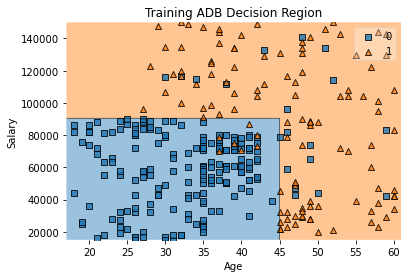

In [17]:
plot_decision_regions(x_train,y_train,clf=gb)
plt.title("Training ADB Decision Region")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

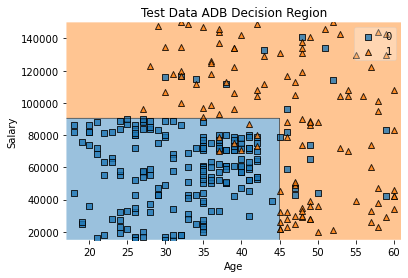

In [18]:
plot_decision_regions(x_train,y_train,clf=gb)
plt.title("Test Data ADB Decision Region")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

In [19]:
gb.feature_importances_

array([0.51310915, 0.48689085])

In [20]:
gb.n_estimators

10

# ROC_AUC Metrics

In [21]:
from sklearn.metrics import roc_curve,auc

In [22]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

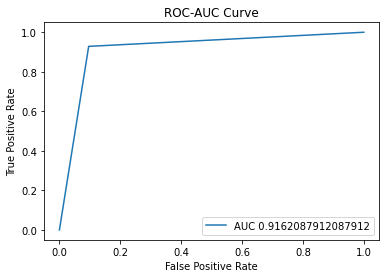

In [23]:
plt.plot(fpr,tpr,label="AUC "+str(auc(fpr,tpr)))
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()